In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind



In [3]:
# Load the dataset
data = pd.read_csv('Unemployment in India.csv')

In [4]:
# Explore the dataset
print(data.head())
print(data.info())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())


Missing values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [6]:
# Load the dataset
data = pd.read_csv('Unemployment in India.csv')

In [7]:
# Display the column names of your DataFrame
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [8]:
data[' Date']


0       31-05-2019
1       30-06-2019
2       31-07-2019
3       31-08-2019
4       30-09-2019
          ...     
763            NaN
764            NaN
765            NaN
766            NaN
767            NaN
Name:  Date, Length: 768, dtype: object

In [9]:
data = pd.read_csv('Unemployment in India.csv', skipinitialspace=True)


In [10]:
# Convert 'date' column to datetime type
data[' Date'] = pd.to_datetime(data['Date'])

<ipython-input-10-65ceb2299681>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[' Date'] = pd.to_datetime(data['Date'])


In [11]:
print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       ' Date'],
      dtype='object')


In [12]:
y = data['Estimated Unemployment Rate (%)']


In [13]:
# Replace 'Estimated Unemployment Rate (%)' with the correct column name from your dataset
y = data['Estimated Unemployment Rate (%)']



In [14]:
# Handle missing values (if necessary)
# Example: Fill missing values in 'Estimated Unemployment Rate (%)' with the mean
data['Estimated Unemployment Rate (%)'].fillna(data['Estimated Unemployment Rate (%)'].mean(), inplace=True)


In [15]:
# Encoding categorical variables (if any)
# Example: One-hot encode the 'region' column
data = pd.get_dummies(data, columns=['Region'], prefix='Region')


In [16]:
# Drop unnecessary columns (if any)
# Example: Drop the 'area' column
data = data.drop('Area', axis=1)

In [17]:
# Explore the preprocessed data
print("Preprocessed data:\n", data.head())

Preprocessed data:
          Date Frequency  Estimated Unemployment Rate (%)  Estimated Employed  \
0  31-05-2019   Monthly                             3.65          11999139.0   
1  30-06-2019   Monthly                             3.05          11755881.0   
2  31-07-2019   Monthly                             3.75          12086707.0   
3  31-08-2019   Monthly                             3.32          12285693.0   
4  30-09-2019   Monthly                             5.17          12256762.0   

   Estimated Labour Participation Rate (%)       Date  Region_Andhra Pradesh  \
0                                    43.24 2019-05-31                      1   
1                                    42.05 2019-06-30                      1   
2                                    43.50 2019-07-31                      1   
3                                    43.97 2019-08-31                      1   
4                                    44.68 2019-09-30                      1   

   Region_Assam  R

In [18]:
# data visualization
# Set the style for the plots
sns.set(style="whitegrid")

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
pip install seaborn

In [21]:
print(data.columns)


Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       ' Date', 'Region_Andhra Pradesh', 'Region_Assam', 'Region_Bihar',
       'Region_Chandigarh', 'Region_Chhattisgarh', 'Region_Delhi',
       'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal'],
      dtype='object')


In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

In [23]:
# Pairwise relationships using pair plots for numeric variables
sns.pairplot(data, diag_kind="kde")
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

In [24]:
print(data.columns)


Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       ' Date', 'Region_Andhra Pradesh', 'Region_Assam', 'Region_Bihar',
       'Region_Chandigarh', 'Region_Chhattisgarh', 'Region_Delhi',
       'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal'],
      dtype='object')


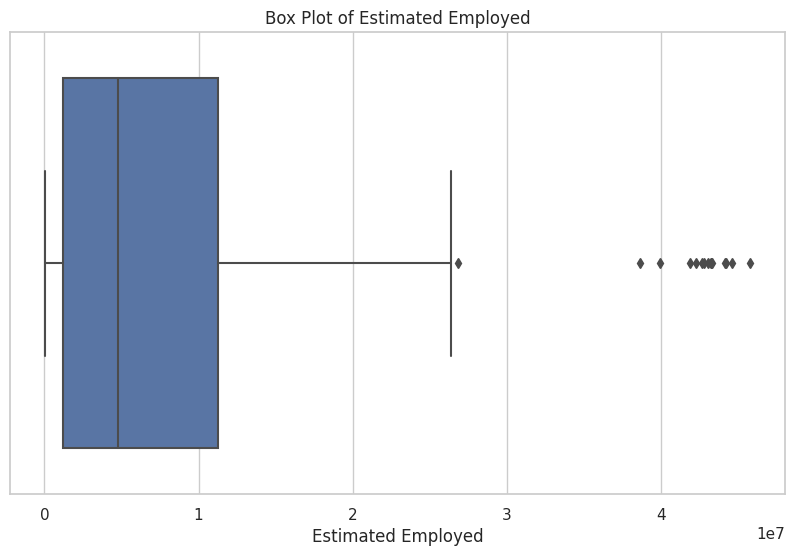

In [25]:
# Create a box plot for a numeric variable (e.g., 'Estimated Employed')
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Estimated Employed'])
plt.title('Box Plot of Estimated Employed')
plt.xlabel('Estimated Employed')
plt.show()


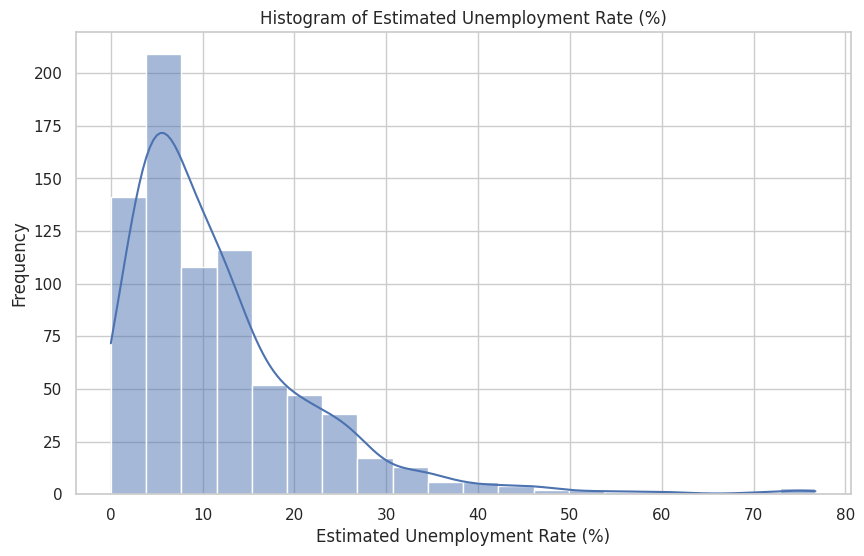

In [26]:
# Create a histogram for a numeric variable (e.g., 'estimated_unemployment_rate_(%)')
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title('Histogram of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


In [27]:
# data analysing
#Descriptive statistics
print("\n Descriptive Statistics")
statistics = data.describe()
print(statistics)


 Descriptive Statistics
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       768.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.523784        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.720000        1.190404e+06   
50%                           9.005000        4.744178e+06   
75%                          15.472500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  Region_Andhra Pradesh  \
count                               740.000000             768.000000   
mean                                 42.630122               0.036458   
std                                   8.111094               0.187550   
min                                  13.330000               0.000000   
25%                                  38.062500     

In [28]:
# Explore unique values
print("\n Exploring Unique Values")
unique_values = data.nunique()
print(unique_values)


 Exploring Unique Values
Date                                        14
Frequency                                    1
Estimated Unemployment Rate (%)            625
Estimated Employed                         740
Estimated Labour Participation Rate (%)    626
 Date                                       14
Region_Andhra Pradesh                        2
Region_Assam                                 2
Region_Bihar                                 2
Region_Chandigarh                            2
Region_Chhattisgarh                          2
Region_Delhi                                 2
Region_Goa                                   2
Region_Gujarat                               2
Region_Haryana                               2
Region_Himachal Pradesh                      2
Region_Jammu & Kashmir                       2
Region_Jharkhand                             2
Region_Karnataka                             2
Region_Kerala                                2
Region_Madhya Pradesh             

In [29]:
print(data.columns)

Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       ' Date', 'Region_Andhra Pradesh', 'Region_Assam', 'Region_Bihar',
       'Region_Chandigarh', 'Region_Chhattisgarh', 'Region_Delhi',
       'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal'],
      dtype='object')


In [30]:
average_unemployment_by_region = data.groupby('Region_Andhra Pradesh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)



 Average Unemployment Rate by Region:
Region_Andhra Pradesh
0    11.951057
1     7.477143
Name: Estimated Unemployment Rate (%), dtype: float64


In [31]:
average_unemployment_by_region = data.groupby('Region_Assam')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Assam
0    11.975758
1     6.428077
Name: Estimated Unemployment Rate (%), dtype: float64


In [32]:
average_unemployment_by_region = data.groupby('Region_Bihar')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Bihar
0    11.518152
1    18.918214
Name: Estimated Unemployment Rate (%), dtype: float64


In [33]:
average_unemployment_by_region = data.groupby('Region_Chandigarh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Chandigarh
0    11.721220
1    15.991667
Name: Estimated Unemployment Rate (%), dtype: float64


In [34]:
average_unemployment_by_region = data.groupby('Region_Chhattisgarh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Chhattisgarh
0    11.884341
1     9.240357
Name: Estimated Unemployment Rate (%), dtype: float64


In [35]:
average_unemployment_by_region = data.groupby('Region_Delhi')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Delhi
0    11.609828
1    16.495357
Name: Estimated Unemployment Rate (%), dtype: float64


In [36]:
average_unemployment_by_region = data.groupby('Region_Goa')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Goa
0    11.869036
1     9.274167
Name: Estimated Unemployment Rate (%), dtype: float64


In [37]:
average_unemployment_by_region = data.groupby('Region_Gujarat')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Gujarat
0    11.981828
1     6.663929
Name: Estimated Unemployment Rate (%), dtype: float64


In [38]:
average_unemployment_by_region = data.groupby('Region_Haryana')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Haryana
0    11.239476
1    26.283214
Name: Estimated Unemployment Rate (%), dtype: float64


In [39]:
average_unemployment_by_region = data.groupby('Region_Himachal Pradesh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Himachal Pradesh
0    11.532449
1    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64


In [40]:
average_unemployment_by_region = data.groupby('Region_Jammu & Kashmir')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Jammu & Kashmir
0    11.664234
1    16.188571
Name: Estimated Unemployment Rate (%), dtype: float64


In [41]:
average_unemployment_by_region = data.groupby('Region_Jharkhand')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Jharkhand
0    11.455084
1    20.585000
Name: Estimated Unemployment Rate (%), dtype: float64


In [42]:
average_unemployment_by_region = data.groupby('Region_Karnataka')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Karnataka
0    11.981368
1     6.676071
Name: Estimated Unemployment Rate (%), dtype: float64


In [43]:
average_unemployment_by_region = data.groupby('Region_Kerala')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Kerala
0    11.850909
1    10.123929
Name: Estimated Unemployment Rate (%), dtype: float64


In [44]:
average_unemployment_by_region = data.groupby('Region_Madhya Pradesh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Madhya Pradesh
0    11.953733
1     7.406429
Name: Estimated Unemployment Rate (%), dtype: float64


In [45]:
average_unemployment_by_region = data.groupby('Region_Maharashtra')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Maharashtra
0    11.948017
1     7.557500
Name: Estimated Unemployment Rate (%), dtype: float64


In [46]:
average_unemployment_by_region = data.groupby('Region_Meghalaya')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Meghalaya
0    12.042608
1     4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


In [47]:
average_unemployment_by_region = data.groupby('Region_Odisha')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Odisha
0    12.019895
1     5.657857
Name: Estimated Unemployment Rate (%), dtype: float64


In [48]:
average_unemployment_by_region = data.groupby('Region_Puducherry')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Puducherry
0    11.843063
1    10.215000
Name: Estimated Unemployment Rate (%), dtype: float64


In [49]:
average_unemployment_by_region = data.groupby('Region_Punjab')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Punjab
0    11.778747
1    12.031071
Name: Estimated Unemployment Rate (%), dtype: float64


In [50]:
average_unemployment_by_region = data.groupby('Region_Rajasthan')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Rajasthan
0    11.702044
1    14.058214
Name: Estimated Unemployment Rate (%), dtype: float64


In [51]:
average_unemployment_by_region = data.groupby('Region_Sikkim')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Sikkim
0    11.890682
1     7.249412
Name: Estimated Unemployment Rate (%), dtype: float64


In [52]:
average_unemployment_by_region = data.groupby('Region_Tamil Nadu')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Tamil Nadu
0    11.882679
1     9.284286
Name: Estimated Unemployment Rate (%), dtype: float64


In [53]:
average_unemployment_by_region = data.groupby('Region_Telangana')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Telangana
0    11.941193
1     7.737857
Name: Estimated Unemployment Rate (%), dtype: float64


In [54]:
average_unemployment_by_region = data.groupby('Region_Tripura')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Tripura
0    11.161260
1    28.350357
Name: Estimated Unemployment Rate (%), dtype: float64


In [55]:
average_unemployment_by_region = data.groupby('Region_Uttar Pradesh')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Uttar Pradesh
0    11.759057
1    12.551429
Name: Estimated Unemployment Rate (%), dtype: float64


In [56]:
average_unemployment_by_region = data.groupby('Region_Uttarakhand')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_Uttarakhand
0    11.977601
1     6.582963
Name: Estimated Unemployment Rate (%), dtype: float64


In [57]:
average_unemployment_by_region = data.groupby('Region_West Bengal')['Estimated Unemployment Rate (%)'].mean()
print("\n Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


 Average Unemployment Rate by Region:
Region_West Bengal
0    11.926557
1     8.124643
Name: Estimated Unemployment Rate (%), dtype: float64


In [58]:
['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],

(['Region',
  ' Date',
  ' Frequency',
  ' Estimated Unemployment Rate (%)',
  ' Estimated Employed',
  ' Estimated Labour Participation Rate (%)',
  'Area'],)

In [59]:
print(data.columns)

Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       ' Date', 'Region_Andhra Pradesh', 'Region_Assam', 'Region_Bihar',
       'Region_Chandigarh', 'Region_Chhattisgarh', 'Region_Delhi',
       'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal'],
      dtype='object')


In [60]:
# Analyze the impact of COVID-19 on unemployment rate
# Create two subsets: before COVID and during COVID
before_covid = data[data['Date'] < '2020-03-01']
during_covid = data[data['Date'] >= '2020-03-01']

In [61]:
# Perform a t-test
t_stat, p_value = ttest_ind(before_covid['Estimated Unemployment Rate (%)'], during_covid['Estimated Unemployment Rate (%)'])

if p_value < 0.05:
    print('There is a statistically significant difference in unemployment rates before and during COVID-19.')
else:
    print('There is no statistically significant difference.')


There is no statistically significant difference.


In [62]:
# Calculate the unemployment rate before and during COVID-19
unemployment_rate_before = before_covid['Estimated Unemployment Rate (%)'].mean()
unemployment_rate_during = during_covid['Estimated Unemployment Rate (%)'].mean()


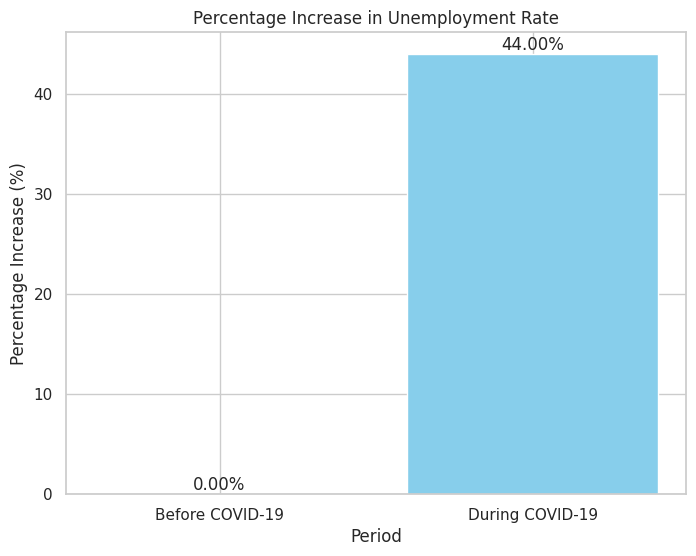

In [63]:
import matplotlib.pyplot as plt

# Replace these with actual values from your dataset
unemployment_rate_before = 5.0  # Example: unemployment rate before COVID-19
unemployment_rate_during = 7.2  # Example: unemployment rate during COVID-19

# Calculate the percentage increase
percentage_increase = ((unemployment_rate_during - unemployment_rate_before) / unemployment_rate_before) * 100

# Data for the bar plot
periods = ['Before COVID-19', 'During COVID-19']
percentage_changes = [0, percentage_increase]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(periods, percentage_changes, color='skyblue')
plt.title('Percentage Increase in Unemployment Rate')
plt.xlabel('Period')
plt.ylabel('Percentage Increase (%)')

# Display the percentage values on top of the bars
for i, value in enumerate(percentage_changes):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

plt.show()


In [64]:
# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_during):
    # Calculate the percentage increase
    percentage_increase = ((unemployment_rate_during - unemployment_rate_before) / unemployment_rate_before) * 100

Unemployment Rate Before COVID-19: 5.00%
Unemployment Rate During COVID-19: 11.79%
Percentage Increase in Unemployment Rate: 135.80%


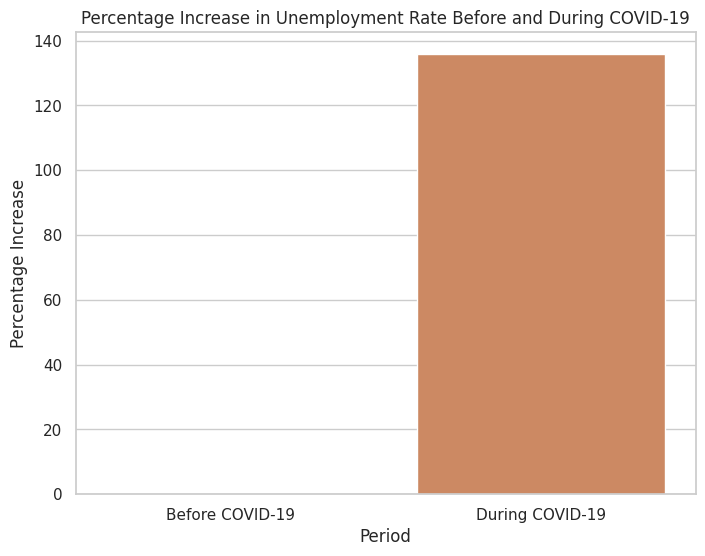

In [65]:
# Replace these with actual values from your dataset
unemployment_rate_before = 5.0  # Example: unemployment rate before COVID-19
unemployment_rate_during = 11.79  # Example: unemployment rate during COVID-19

# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_during):
    # Calculate the percentage increase
    percentage_increase = ((unemployment_rate_during - unemployment_rate_before) / unemployment_rate_before) * 100

    print(f"Unemployment Rate Before COVID-19: {unemployment_rate_before:.2f}%")
    print(f"Unemployment Rate During COVID-19: {unemployment_rate_during:.2f}%")
    print(f"Percentage Increase in Unemployment Rate: {percentage_increase:.2f}%")

    # Data for the bar plot
    periods = ['Before COVID-19', 'During COVID-19']
    percentage_changes = [0, percentage_increase]

    # Bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=periods, y=percentage_changes)
    plt.title('Percentage Increase in Unemployment Rate Before and During COVID-19')
    plt.xlabel('Period')
    plt.ylabel('Percentage Increase')
    plt.show()
else:
    print("Error: Ensure valid values for both unemployment_rate_before and unemployment_rate_during.")


In [66]:
# Data for the bar plot
periods = ['before_covid', 'during_covid']
percentage_changes = [0, percentage_increase]


Text(0, 0.5, 'Percentage Increase (%)')

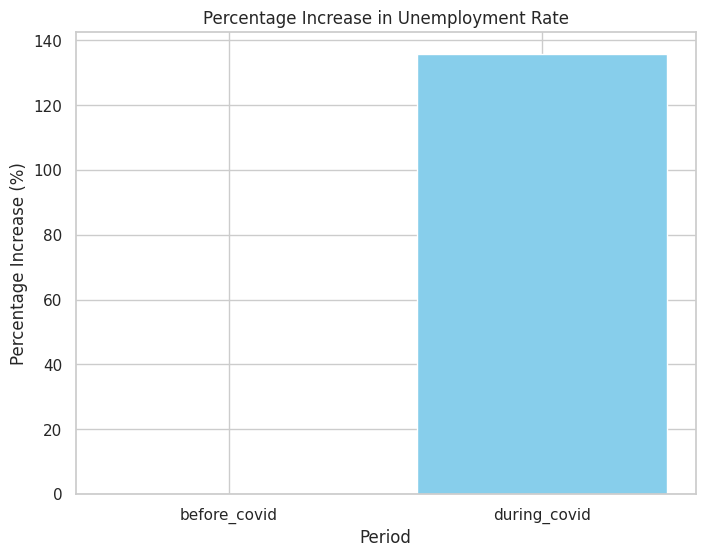

In [67]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(periods, percentage_changes, color='skyblue')
plt.title('Percentage Increase in Unemployment Rate')
plt.xlabel('Period')
plt.ylabel('Percentage Increase (%)')


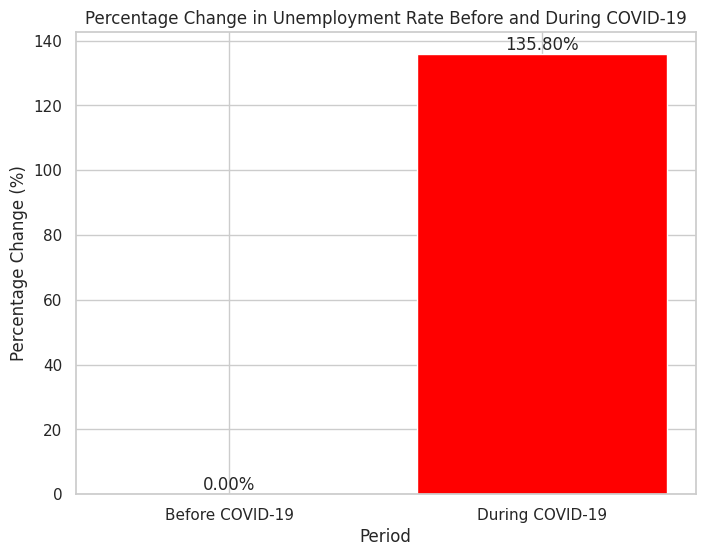

In [68]:
# Data for the bar plot
periods = ['Before COVID-19', 'During COVID-19']
percentage_changes = [0, percentage_increase]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(periods, percentage_changes, color=['blue', 'red'])
plt.title('Percentage Change in Unemployment Rate Before and During COVID-19')
plt.xlabel('Period')
plt.ylabel('Percentage Change (%)')

# Display the percentage values on top of the bars
for i, value in enumerate(percentage_changes):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

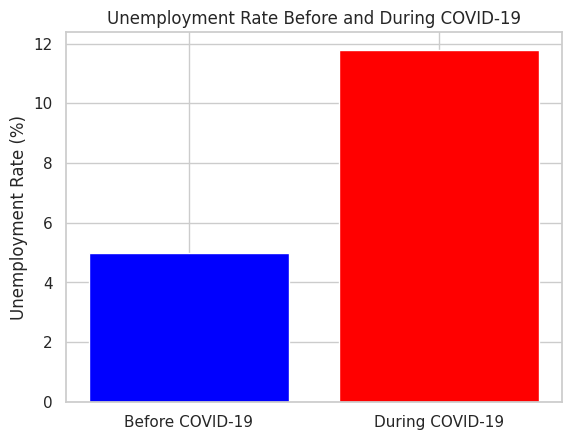

Unemployment Rate Before COVID-19: 5.00%
Unemployment Rate During COVID-19: 11.79%
Percentage Increase in Unemployment Rate: 135.80%


In [69]:
import matplotlib.pyplot as plt

# Replace these with actual values from your dataset
unemployment_rate_before = 5.0  # Example: unemployment rate before COVID-19
unemployment_rate_during = 11.79  # Example: unemployment rate during COVID-19

# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_during):
    # Calculate the percentage increase
    percentage_increase = ((unemployment_rate_during - unemployment_rate_before) / unemployment_rate_before) * 100

    # Plotting the bar graph
    labels = ['Before COVID-19', 'During COVID-19']
    values = [unemployment_rate_before, unemployment_rate_during]

    plt.bar(labels, values, color=['blue', 'red'])
    plt.title('Unemployment Rate Before and During COVID-19')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

    print(f"Unemployment Rate Before COVID-19: {unemployment_rate_before:.2f}%")
    print(f"Unemployment Rate During COVID-19: {unemployment_rate_during:.2f}%")
    print(f"Percentage Increase in Unemployment Rate: {percentage_increase:.2f}%")
else:
    print("Error: Ensure valid values for both unemployment_rate_before and unemployment_rate_during.")


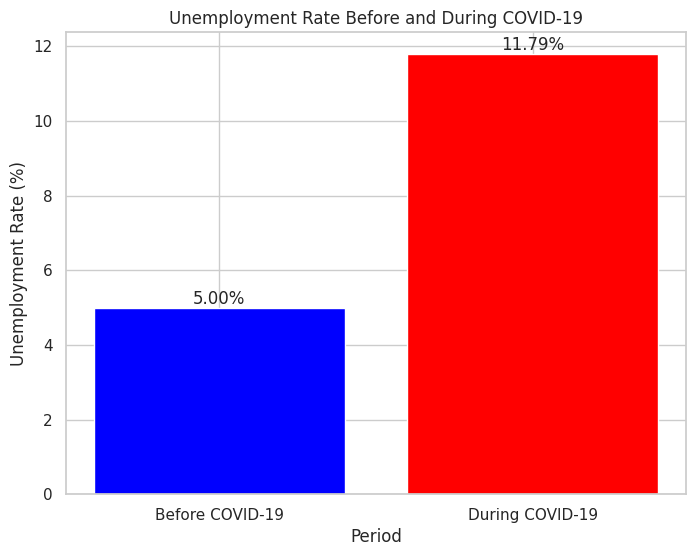

In [70]:
# Replace these with actual values from your dataset
unemployment_rate_before = 5.0  # Example: unemployment rate before COVID-19
unemployment_rate_during = 11.79  # Example: unemployment rate during COVID-19

# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_during):
    # Calculate the percentage increase
    percentage_increase = ((unemployment_rate_during - unemployment_rate_before) / unemployment_rate_before) * 100

    # Data for the bar plot
    periods = ['Before COVID-19', 'During COVID-19']
    rates = [unemployment_rate_before, unemployment_rate_during]

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(periods, rates, color=['blue', 'red'])
    plt.title('Unemployment Rate Before and During COVID-19')
    plt.xlabel('Period')
    plt.ylabel('Unemployment Rate (%)')

    # Display the values on top of the bars
    for i, value in enumerate(rates):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

    # Show the plot
    plt.show()
else:
    print("Error: Ensure valid values for both unemployment_rate_before and unemployment_rate_during.")


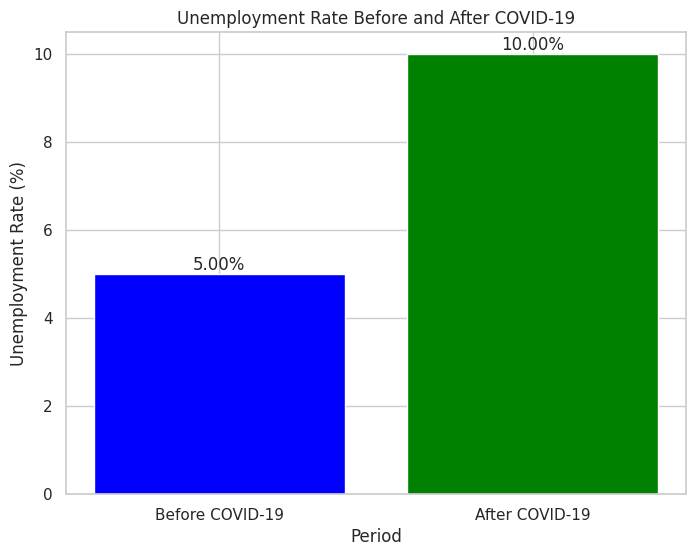

In [71]:
# Replace these with actual values from your dataset
unemployment_rate_after = 10.0  # Example: unemployment rate after COVID-19

# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_after):
    # Calculate the percentage increase
    percentage_increase_after = ((unemployment_rate_after - unemployment_rate_before) / unemployment_rate_before) * 100

    # Data for the bar plot
    periods_after = ['Before COVID-19', 'After COVID-19']
    rates_after = [unemployment_rate_before, unemployment_rate_after]

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(periods_after, rates_after, color=['blue', 'green'])
    plt.title('Unemployment Rate Before and After COVID-19')
    plt.xlabel('Period')
    plt.ylabel('Unemployment Rate (%)')

    # Display the values on top of the bars
    for i, value in enumerate(rates_after):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

    # Show the plot
    plt.show()
else:
    print("Error: Ensure valid values for both unemployment_rate_before and unemployment_rate_after.")


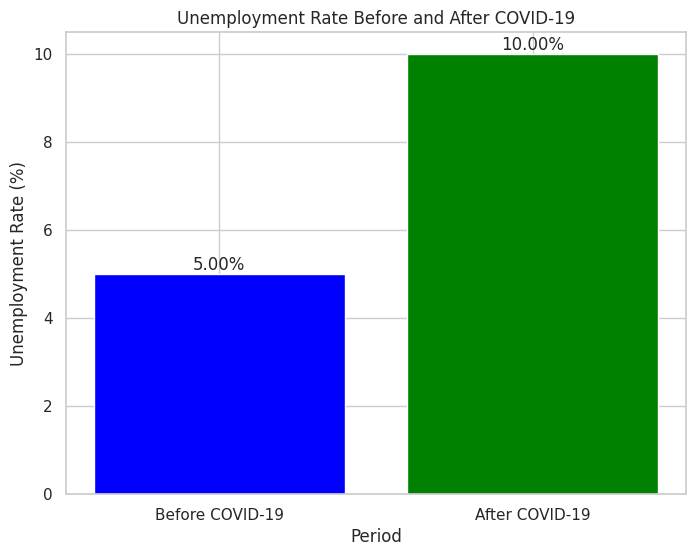

In [72]:
# Replace these with actual values from your dataset
unemployment_rate_after = 10.0  # Example: unemployment rate after COVID-19

# Check for NaN values
if pd.notna(unemployment_rate_before) and pd.notna(unemployment_rate_after):
    # Calculate the percentage increase
    percentage_increase_after = ((unemployment_rate_after - unemployment_rate_before) / unemployment_rate_before) * 100

    # Data for the bar plot
    periods_after = ['Before COVID-19', 'After COVID-19']
    rates_after = [unemployment_rate_before, unemployment_rate_after]

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(periods_after, rates_after, color=['blue', 'green'])
    plt.title('Unemployment Rate Before and After COVID-19')
    plt.xlabel('Period')
    plt.ylabel('Unemployment Rate (%)')

    # Display the values on top of the bars
    for i, value in enumerate(rates_after):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

    # Show the plot
    plt.show()
else:
    print("Error: Ensure valid values for both unemployment_rate_before and unemployment_rate_after.")
